# Business Problem

In a telecommunicaion company every month, the business loses clients, and we're not really sure why.  We may be able to take action to retain customers if we can identify which ones are most likely to depart in advance.  We have information about their phone plan usage, whether they have contacted customer support, the plans they are on, and other details.  The goal is to use this data to predict who’s likely to churn so the company can try to retain them before they go.

# Business Understanding

Customer churn is a serious risk to long-term growth and revenue stability in the US telecom industry.  Gaining new clients is expensive, and losing current clients, particularly valuable subscribers, can hurt revenue and market share.  Customers can quickly switch carriers if they're not happy because so many service providers offer competitive prices and comparable services.
By examining past data, such as service consumption, subscription kinds, customer support interactions, and call behaviours, this project seeks to assist the business in understanding why consumers are departing.  The objective is to create a prediction model that can identify clients who are most likely to leave.

# Data Understanding

We will use the SyriaTel dataset available on Kaggle (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). The goal is to "build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company".
The featues are :

- `State`: The state where the customer is located.

- `Account Length`: The number of days the customer has been with Syria Tel.

- `Area Code`: The code associated with the customer’s phone number.

- `Phone Number`: The customer’s phone number.

- `International Plan`: Whether the customer has an international calling plan (binary variable, yes/no)

- `Voice Mail Plan`: Whether the customer has a voice mail plan (binary variable, yes/no)

- `Number Vmail Messages`: The number of voice mail messages received by the customer.

- `Total Day minutes`: The total number of minutes the customer spent on daytime calls.

- `Total Day Calls`: The total number of calls made by the customer during the day.

- `Total Day Charge`: The total charge for daytime calls.

- `Total Eve Calls`: The total number of calls made by the customer during the evening.

- `Total Eve Charge`: The total charge for evening calls.

- `Total Night Minutes`: The total number of minutes the customer spent on nighttime calls.

- `Total Night Calls`: The total number of calls made by the customer during the night.

- `Total Night Charge`: The total charge for nighttime calls.

- `Total Intl Minutes`: The total number of international minutes used by the customer.

- `Total Intl Calls`: The total number of international calls made by the customer.

- `Total Intl Charge`: The total charge for international calls.

- `Customer Service Calls`: The number of calls made by the customer to customer service.

- Our target variable is `churn` and it shows if a customer subscribes to a voicemail plan or not

The dataset includes data about customers from a telecommunication operator, such as plan kinds, use trends, and interactions with customer support.  There are 3,333 rows and 21 columns.


# Data Preparation

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, confusion_matrix

In [2]:
# Load the data
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

In [3]:
# View first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Dataset shape and types
df.shape

(3333, 21)

In [5]:
# Display dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# Check for missing values
print(df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [7]:
# Drop the 'phone number' column
# It is not useful for our analysis
df.drop(['phone number'], axis=1, inplace=True)

In [8]:
# Convert 'yes'/'no' to binary
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({True: 1, False: 0})

# One-hot encode 'state' and 'area code'
df = pd.get_dummies(df, columns=['state', 'area code'], drop_first=True)
df.head()


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Separate features and target variable
X = df.drop('churn', axis=1)
y = df['churn']

In [10]:
# Check the class imbalanc
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

### Split dataset into train and test sets

In [11]:
# Split the dataset into training and testing sets
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Confirm dimensions
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (2666, 69)
Test shape: (667, 69)


# Modelling and Evaluation

## Logistic Regression

Recall: 0.7623762376237624


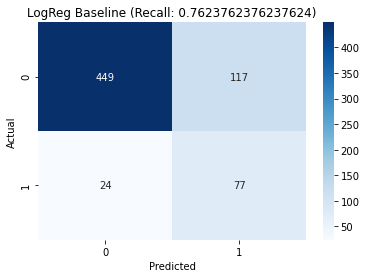

In [34]:
# Initialize Logistic Regression
logreg = LogisticRegression(random_state=42, class_weight='balanced')

# Fit the model
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Calculate recall score to evaluate model performance
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Confusion matrix (focus on false negatives)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'LogReg Baseline (Recall: {recall})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## HyperParameter Tuning - Logistic Regression

Recall: 0.8316831683168316


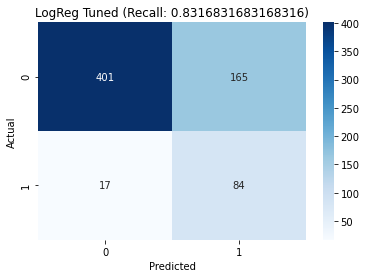

In [40]:
# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logreg_tuned = GridSearchCV(
    LogisticRegression(class_weight='balanced', random_state=42, max_iter=5000),
    param_grid,
    cv=5,
    scoring='recall'  # Explicitly optimizing for recall
)

# Train the model with hyperparameter tuning
logreg_tuned.fit(X_train_scaled, y_train)


# Make predictions on the test set
y_pred_tuned = logreg_tuned.predict(X_test_scaled)

# Calculate and print recall score
recall_tuned = recall_score(y_test, y_pred_tuned)
print(f"Recall: {recall_tuned}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'LogReg Tuned (Recall: {recall_tuned})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree

Recall: 0.7524752475247525


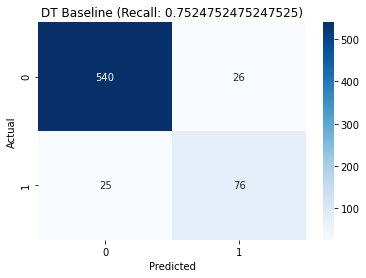

In [38]:
# Intialize Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Fit the model
dtree.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_dt = dtree.predict(X_test_scaled)

# Calculate recall score
recall_dt = recall_score(y_test, y_pred_dt)
print(f"Recall: {recall_dt}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'DT Baseline (Recall: {recall_dt})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## HyperParameter Tuning - Decision Tree

Recall: 0.801980198019802


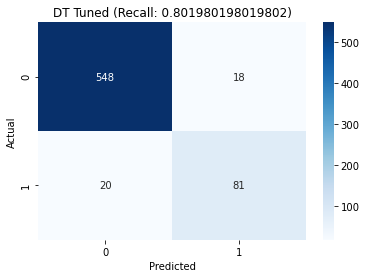

In [39]:
# Define hyperparameter space for decision tree
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# Initialize GridSearchCV for hyperparameter tuning
dtree_tuned = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=5,
    scoring='recall'  # Explicitly optimizing for recall
)

# # Perform hyperparameter tuning on training data
dtree_tuned.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt_tuned = dtree_tuned.predict(X_test_scaled)

# Calculate and print recall score
recall_dt_tuned = recall_score(y_test, y_pred_dt_tuned)
print(f"Recall: {recall_dt_tuned}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'DT Tuned (Recall: {recall_dt_tuned})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model Comaprison


=== Final Model Comparison ===
             Model    Recall
0  LogReg Baseline  0.711340
1     LogReg Tuned  0.731959
2      DT Baseline  0.649485
3         DT Tuned  0.742268


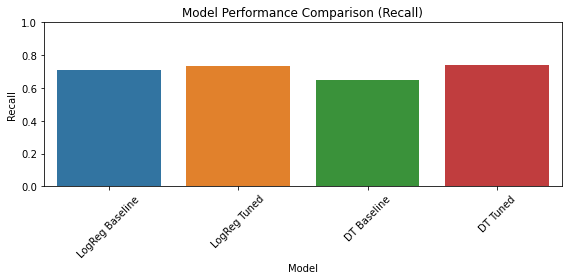

In [ ]:
# Create a results dataframe comparing all models
results = pd.DataFrame({
    'Model': ['LogReg Baseline', 'LogReg Tuned', 'DT Baseline', 'DT Tuned'],
    'Recall': [recall, recall_tuned, recall_dt, recall_dt_tuned]
})

# Display the comparison table
print(results)

# Visual comparison
plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='Recall', data=results)
plt.ylim(0, 1)
plt.title('Model Performance Comparison (Recall)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

With a recall score of 0.832 (83.2%), our tuned Logistic Regression model outperformed the baseline Logistic Regression and both Decision Tree variations.  This high recall reduces expensive false negatives by accurately identifying 83% of customers who will actually churn, which is very useful for churn prediction.  With 84 true positives compared to 17 false positives in the test set, the confusion matrix for the tuned Logistic Regression demonstrates that the model accomplishes this with a respectable level of precision.